## Quiz #0204

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in the data.

In [ ]:
# Go to the directory where the data file is located. 
# os.chdir(r'~~')                # Please, replace the path with your own.

In [2]:
df = pd.read_csv('data_coffeeshop.csv', header='infer',na_values=[' '])

In [3]:
df.shape

(43182, 3)

In [4]:
df.head(5)

,yearOfStart,CurrentState,sizeOfsite
0,2008.0,In,20.80
1,2010.0,In,212.72
2,2013.0,In,20.04
3,2012.0,In,64.17
4,2002.0,Out,11.40


#### Answer the following questions.

1). Make a frequency table of 'yearOfStart' and visualize by year. 
- Sort by the year.
- Draw a line plot from 1997 to 2014. <= Hint: plt.xlim()

In [31]:
frequency = pd.crosstab(df.yearOfStart,columns = "Frequency")      
frequency.head()

col_0,Frequency
yearOfStart,
1964.0,2
1966.0,2
1967.0,3
1968.0,1
1969.0,2


In [23]:
sorted_freq = frequency.sort_values(by='yearOfStart')
sorted_freq.head()

col_0,Frequency
yearOfStart,
1964.0,2
1966.0,2
1967.0,3
1968.0,1
1969.0,2


Text(0.5, 1.0, 'Year Frequency of the dataframe')

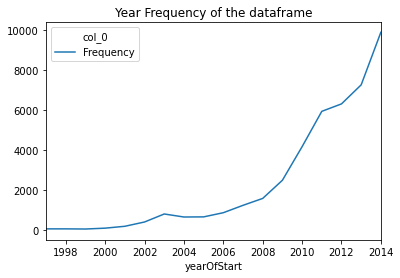

In [49]:
sorted_freq.plot(kind='line')
plt.xlim(1997, 2014)
plt.title("Year Frequency of the dataframe")


2). Now, split the data by the current state of business ('In' or 'Out' of business). Then, visualize the yearly trend of the 'yearOfStart' frequencies. 
- Sort by the year.
- Draw two overlapping line plots from 1997 to 2014.
- Use the 'figure' object.

In [33]:
df_In, df_Out = [x for _, x in df.groupby(df['CurrentState']=='Out')]
df_In

,yearOfStart,CurrentState,sizeOfsite
0,2008.0,In,20.80
1,2010.0,In,212.72
2,2013.0,In,20.04
3,2012.0,In,64.17
5,2013.0,In,10.99
...,...,...,...
43168,2012.0,In,64.14
43172,2014.0,In,29.06
43178,2011.0,In,44.21
43179,2013.0,In,35.70


In [34]:
df_Out

,yearOfStart,CurrentState,sizeOfsite
4,2002.0,Out,11.40
10,2008.0,Out,23.33
15,2006.0,Out,43.00
16,2009.0,Out,15.46
28,2014.0,Out,40.00
...,...,...,...
43174,2003.0,Out,30.67
43175,2012.0,Out,199.76
43176,2008.0,Out,93.84
43177,2014.0,Out,30.61


In [40]:
df_In_sorted = df_In.sort_values(by="yearOfStart")
df_In_sorted.head()

,yearOfStart,CurrentState,sizeOfsite
41426,1967.0,In,59.13
22216,1967.0,In,76.02
18674,1970.0,In,112.60
10884,1970.0,In,35.00
5617,1971.0,In,62.21


In [41]:
df_Out_sorted = df_Out.sort_values(by="yearOfStart")
df_Out_sorted.head()

,yearOfStart,CurrentState,sizeOfsite
42678,1964.0,Out,0.00
21255,1964.0,Out,0.00
26654,1966.0,Out,0.00
37099,1966.0,Out,90.00
7230,1967.0,Out,79.81


No handles with labels found to put in legend.


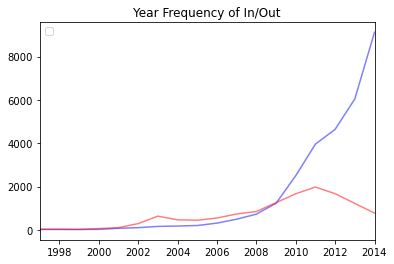

In [87]:
t = pd.crosstab(df_In_sorted.yearOfStart,columns = "Frequency")
plt.plot(t,c='blue', alpha=0.5)    
tt = pd.crosstab(df_Out_sorted.yearOfStart,columns = "Frequency")
plt.plot(tt,c='red', alpha=0.5)  
x = plt.xlim(1997, 2014)
plt.title("Year Frequency of In/Out")
plt.legend(loc="upper left")

3). From the results of 1) and 2), how can you describe the trend in general?

- Around the year 2008, began a steep increase in the number of new coffee shops.
- As of the year 2014, more coffee shops opened in the past 5 years are still in business rather than going out of business.

In [88]:
#According to the plot, the trend is positively correlated with the YearOfStart 
#when the current state is equal to In, that's why there is an increase of new shops in 2008 up to 2014
#But when it the business Out, the trend becomes negatively correlated and gets lower by time.
#And that's why the shops stay in business rather than going out of it